In [1]:
import pyNN.neuron as sim  # can of course replace `nest` with `neuron`, `brian`, etc.
import matplotlib.pyplot as plt
from quantities import nA
from pyNN.random import RandomDistribution, NumpyRNG
import numpy as np

/home/raphael/.virtualenvs/dreem/lib/python3.8/site-packages/pyNN/neuron/__init__.py:14: UserWarning: mpi4py not available
  warnings.warn("mpi4py not available")


In [2]:
def datatonp(vm):
    t=np.array(vm.times)
    V=np.array(vm)
    return t,V

def crossthres(x,thres):
    x2=x-thres
    dx=x2[1:]*x2[:-1]
    return np.where(dx<0)[0].size
def freq(vm,thres,start,stop):
    t,V=datatonp(vm)
    return crossthres(V,thres)/2/(stop-start)*1000

## First LIF Neuron model (IF_curr_exp)

default :  {'v_rest': -65.0, 'cm': 1.0, 'tau_m': 20.0, 'tau_refrac': 0.1, 'tau_syn_E': 5.0, 'tau_syn_I': 5.0, 'i_offset': 0.0, 'v_reset': -65.0, 'v_thresh': -50.0}
New :  {'v_rest': -70.0, 'cm': 0.8, 'tau_m': 20.0, 'tau_refrac': 0.1, 'tau_syn_E': 5.0, 'tau_syn_I': 5.0, 'v_thresh': -50.0, 'v_reset': -67.0, 'i_offset': 0.0}


/home/raphael/.virtualenvs/dreem/lib/python3.8/site-packages/pyNN/neuron/recording.py:115: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  signals = numpy.vstack((id._cell.traces[variable] for id in ids)).T


Text(0, 0.5, 'Vm (mV)')

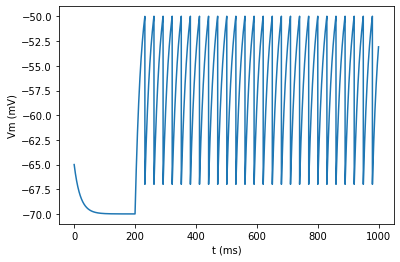

In [3]:
sim.setup()
pyr_parameters=sim.IF_curr_exp.default_parameters
print('default : ' , pyr_parameters)
pyr_parameters={'v_rest': -70.0, 'cm': 0.8, 'tau_m': 20.0, 'tau_refrac': 0.1, 'tau_syn_E': 5.0, 
                'tau_syn_I': 5.0,  'v_thresh': -50.0, 'v_reset': -67.0,
                'i_offset': 0.0}
print('New : ', pyr_parameters)
pyrcell = sim.Population(1, sim.IF_curr_exp(**pyr_parameters))
start,stop=200.0,1000.0
step_current = sim.DCSource(start=start, stop=stop)
step_current.inject_into(pyrcell)

pyrcell.record('v')
#print(pyrcell.celltype.recordable)
amp=1.0
step_current.amplitude = amp
sim.run(1000.0)
sim.reset(annotations={"amplitude": amp * nA})

data = pyrcell.get_data()

sim.end()
vm=data.segments[0].analogsignals[0]
plt.plot(vm.times,vm)
plt.xlabel('t (ms)')
plt.ylabel('Vm (mV)')
#plt.ylim((-50,-45))

In [4]:
freq(vm,-55,start,stop)

33.125

We get a frequency of 33 Hz with IF_curr_exp.

## Second LIF Neuron model (IF_curr_alpha)

default :  {'v_rest': -65.0, 'cm': 1.0, 'tau_m': 20.0, 'tau_refrac': 0.1, 'tau_syn_E': 0.5, 'tau_syn_I': 0.5, 'i_offset': 0.0, 'v_reset': -65.0, 'v_thresh': -50.0}
New :  {'v_rest': -70.0, 'cm': 0.8, 'tau_m': 20.0, 'tau_refrac': 0.1, 'tau_syn_E': 0.5, 'tau_syn_I': 0.5, 'i_offset': 0.0, 'v_reset': -67.0, 'v_thresh': -50.0}


/home/raphael/.virtualenvs/dreem/lib/python3.8/site-packages/pyNN/neuron/recording.py:115: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  signals = numpy.vstack((id._cell.traces[variable] for id in ids)).T


Text(0, 0.5, 'Vm (mV)')

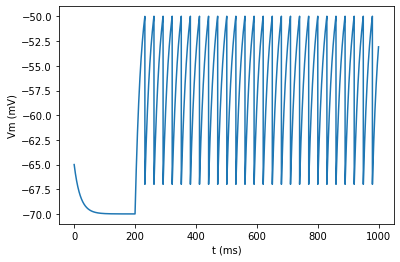

In [14]:
sim.setup()
pyr_parameters=sim.IF_curr_alpha.default_parameters
print('default : ' , pyr_parameters)

pyr_parameters={'v_rest': -70.0, 'cm': 0.8, 'tau_m': 20.0, 'tau_refrac': 0.1, 'tau_syn_E': 0.5,
                'tau_syn_I': 0.5,'i_offset': 0.0, 'v_reset': -67.0, 'v_thresh': -50.0}
print('New : ', pyr_parameters)
pyrcell = sim.Population(1, sim.IF_curr_alpha(**pyr_parameters))
start,stop=200.0,1000.0
step_current = sim.DCSource(start=start, stop=stop)
step_current.inject_into(pyrcell)

pyrcell.record('v')
#print(pyrcell.celltype.recordable)
amp=1.0
step_current.amplitude = amp
sim.run(1000.0)
sim.reset(annotations={"amplitude": amp * nA})

data = pyrcell.get_data()

sim.end()
vm=data.segments[0].analogsignals[0]
plt.plot(vm.times,vm)
plt.xlabel('t (ms)')
plt.ylabel('Vm (mV)')
#plt.ylim((-50,-45))

In [15]:
freq(vm,-55,start,stop)

33.125

We get 33 Hz.

## Third not-LIF Neuron model (EIF_cond_exp_isfa_ista)

default :  {'cm': 0.281, 'tau_refrac': 0.1, 'v_spike': -40.0, 'v_reset': -70.6, 'v_rest': -70.6, 'tau_m': 9.3667, 'i_offset': 0.0, 'a': 4.0, 'b': 0.0805, 'delta_T': 2.0, 'tau_w': 144.0, 'v_thresh': -50.4, 'e_rev_E': 0.0, 'tau_syn_E': 5.0, 'e_rev_I': -80.0, 'tau_syn_I': 5.0}
New :  {'v_rest': -70.0, 'cm': 0.5, 'tau_m': 20.0, 'tau_refrac': 0.1, 'tau_syn_E': 5.0, 'tau_syn_I': 5.0, 'e_rev_E': 0.0, 'e_rev_I': -70.0, 'v_thresh': -50.0, 'v_reset': -67.0, 'i_offset': 0.0}


/home/raphael/.virtualenvs/dreem/lib/python3.8/site-packages/pyNN/neuron/recording.py:115: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  signals = numpy.vstack((id._cell.traces[variable] for id in ids)).T


Text(0, 0.5, 'Vm (mV)')

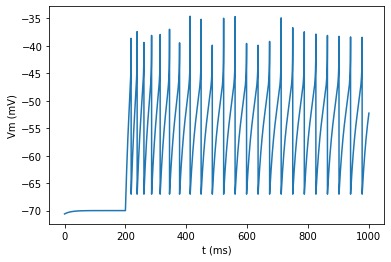

In [16]:
sim.setup()
pyr_parameters=sim.EIF_cond_exp_isfa_ista.default_parameters
print('default : ' , pyr_parameters)
pyr_parameters={'v_rest': -70.0, 'cm': 0.5, 'tau_m': 20.0, 'tau_refrac': 0.1, 'tau_syn_E': 5.0, 
                'tau_syn_I': 5.0, 'e_rev_E': 0.0, 'e_rev_I': -70.0, 'v_thresh': -50.0, 'v_reset': -67.0,
                'i_offset': 0.0}
print('New : ', pyr_parameters)
pyrcell = sim.Population(1, sim.EIF_cond_exp_isfa_ista(**pyr_parameters))
start,stop=200.0,1000.0
step_current = sim.DCSource(start=start, stop=stop)
step_current.inject_into(pyrcell)

pyrcell.record('v')
#print(pyrcell.celltype.recordable)
amp=1.0
step_current.amplitude = amp
sim.run(1000.0)
sim.reset(annotations={"amplitude": amp * nA})

data = pyrcell.get_data()

sim.end()
vm=data.segments[0].analogsignals[0]
plt.plot(vm.times,vm)
plt.xlabel('t (ms)')
plt.ylabel('Vm (mV)')
#plt.ylim((-50,-45))

In [17]:
freq(vm,-55,start,stop)

29.375

We get a frequency of 31 Hz by only changing 3 parameters (Vrest, Vreset and Cm) from their default value and also get similir value (rest and min between spike) as in Alain's Neuron model we used. Moreover, the first spikes are closer in time than the next ones. This is similar to the transient effect seen in Alain's model.